In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')


In [8]:
sales_by_date=df.groupby('Order Date')['Sales'].sum().reset_index()

In [9]:
sales_by_date

,Order Date,Sales
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


In [7]:
import matplotlib.pyplot as plt

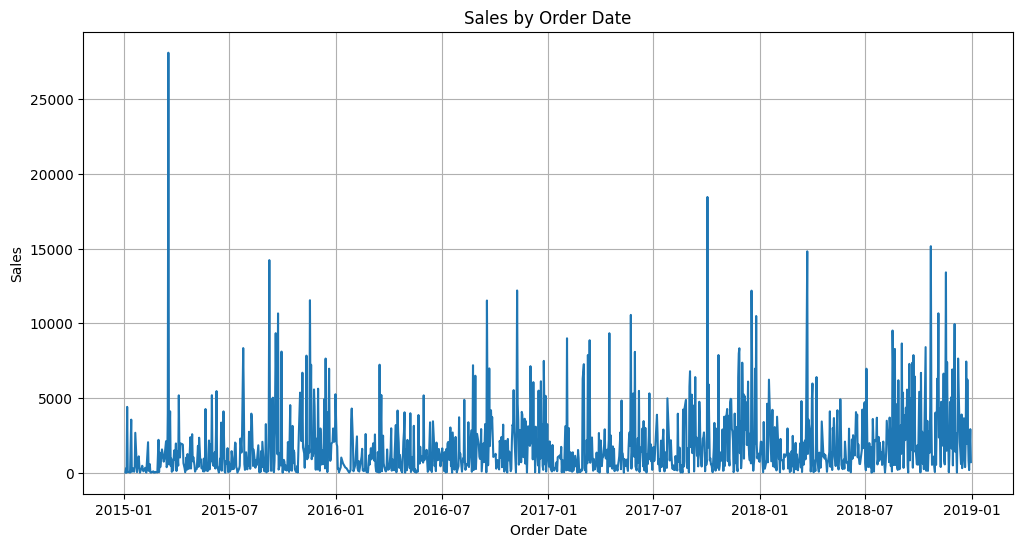

In [10]:
plt.figure(figsize=(12,6))
plt.plot(sales_by_date['Order Date'],sales_by_date['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales by Order Date')
plt.grid(True)
plt.show()


In [14]:
def get(data,lag=1):
  data1=data.copy()
  for i in range(1,lag+1):
    data1[f'lag_{i}']=data1['Sales'].shift(i)
  return data1

lag=5
df_lag=get(df[['Order Date','Sales']],lag)
df_lag=df_lag.dropna()

df_lag

,Order Date,Sales,lag_1,lag_2,lag_3,lag_4,lag_5
0,2017-11-08,261.9600,261.9600,261.9600,261.9600,261.9600,261.9600
1,2017-11-08,731.9400,731.9400,731.9400,731.9400,731.9400,731.9400
2,2017-06-12,14.6200,14.6200,14.6200,14.6200,14.6200,14.6200
3,2016-10-11,957.5775,957.5775,957.5775,957.5775,957.5775,957.5775
4,2016-10-11,22.3680,22.3680,22.3680,22.3680,22.3680,22.3680
...,...,...,...,...,...,...,...
9795,2017-05-21,3.7980,3.7980,3.7980,3.7980,3.7980,3.7980
9796,2016-01-12,10.3680,10.3680,10.3680,10.3680,10.3680,10.3680
9797,2016-01-12,235.1880,235.1880,235.1880,235.1880,235.1880,235.1880
9798,2016-01-12,26.3760,26.3760,26.3760,26.3760,26.3760,26.3760


In [15]:
from sklearn.model_selection import train_test_split


In [17]:
X=df_lag.drop(columns=['Order Date','Sales'])
y=df_lag['Sales']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [28]:
model=xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
p=model.predict(X_test)

In [30]:
import numpy as np
z=np.sqrt(mean_squared_error(y_test,p))

In [34]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,p)
r2score

0.8725120636056551

In [35]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
p=model.predict(X_test)
r2score=r2_score(y_test,p)
r2score



0.9952273574337555